In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [2]:
traffic_traffic_df = pd.read_csv("Traffic.csv")

In [3]:
traffic_df.head()

NameError: name 'df' is not defined

In [5]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


<Axes: xlabel='CarCount', ylabel='BikeCount'>

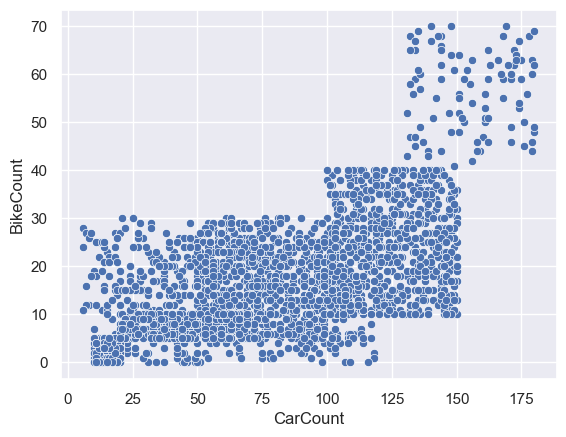

In [14]:
sns.scatterplot(x = "CarCount", y = "BikeCount",data = traffic_df)

In [15]:
another = pd.read_csv("Traffic.csv")